# Rating Classification

In [1]:
from load import main
df = main()
df

,rating,alcohol,price,lat,lng,age,category_Dessert,category_Fortified,category_Port/Sherry,category_Red,...,reviewer_Kerin O’Keefe,reviewer_Lauren Buzzeo,reviewer_Matt Kettmann,reviewer_Michael Schachner,reviewer_Mike DeSimone,reviewer_Paul Gregutt,reviewer_Roger Voss,reviewer_Sean P. Sullivan,reviewer_Susan Kostrzewa,reviewer_Virginie Boone
6180,84,13.0,17,41.170042,-7.304750,10,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6201,93,0.0,50,41.170042,-7.304750,8,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6274,87,0.0,0,41.170042,-7.304750,15,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6306,92,13.0,45,41.170042,-7.304750,7,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6317,89,13.5,18,41.170042,-7.304750,14,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320252,86,14.5,20,-35.113970,-71.279980,17,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
320253,82,13.0,18,-35.113970,-71.279980,18,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
320254,83,14.0,13,-35.113970,-71.279980,16,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
320665,91,14.0,25,-34.999037,-71.381712,9,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [2]:
from sklearn.model_selection import KFold, cross_val_score

In [3]:
X = df.drop("rating", axis=1).values
y = df["rating"].to_numpy()

In [4]:
print(X.shape)
print(y.shape)

(5020, 619)
(5020,)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, stdev
from copy import deepcopy

# Folds
from sklearn.model_selection import KFold

# Scoring
from sklearn.metrics import mean_absolute_error

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import matplotlib.pyplot as plt

[[ 13.          17.          41.17004195 ...   0.           0.
    0.        ]
 [  0.          50.          41.17004195 ...   0.           0.
    0.        ]
 [  0.           0.          41.17004195 ...   0.           0.
    0.        ]
 ...
 [ 14.          13.         -35.1139703  ...   0.           0.
    0.        ]
 [ 14.          25.         -34.9990365  ...   0.           0.
    0.        ]
 [ 13.5         25.         -34.9990365  ...   0.           0.
    0.        ]]
accuracy: 0.9938247011952192
[0.20517928 0.19920319 0.22709163 0.19920319 0.19721116 0.17928287
 0.21713147 0.22310757 0.18924303 0.20717131]
k_1: accuracies_mean: 0.2043824701195219, accuracies_std: 0.014147634186904146


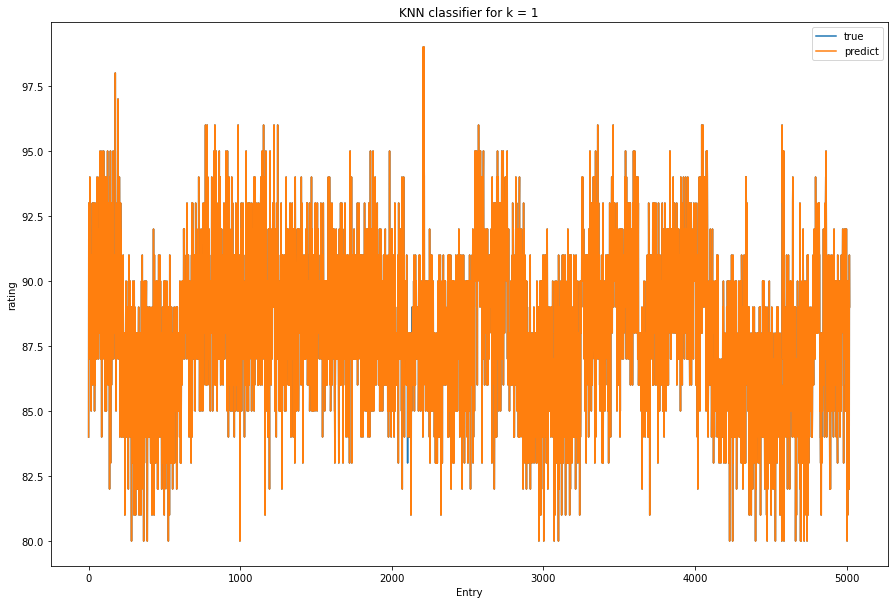

accuracy: 0.47290836653386453
[0.187251   0.16733068 0.18924303 0.18326693 0.15139442 0.20318725
 0.20916335 0.18525896 0.17131474 0.16533865]
k_4: accuracies_mean: 0.18127490039840638, accuracies_std: 0.01678515891070988


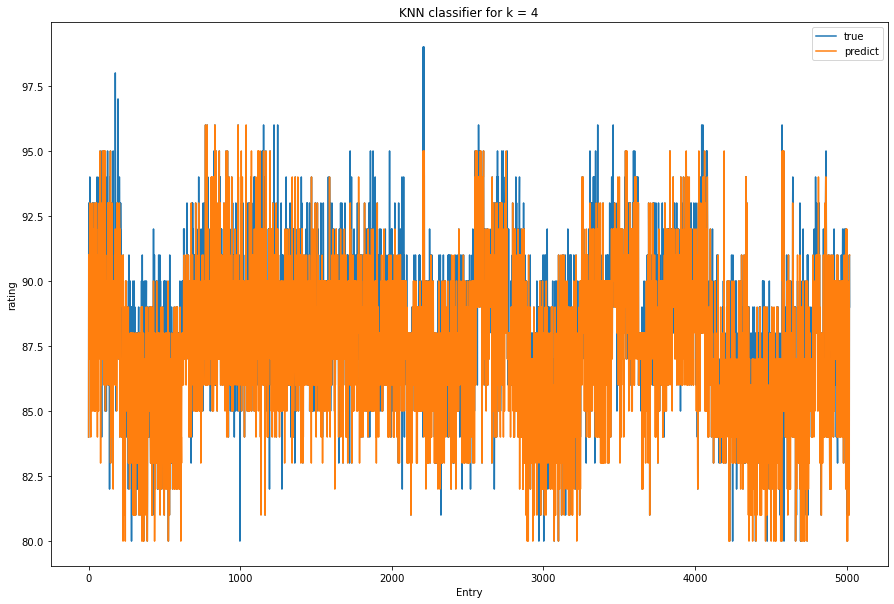

accuracy: 0.3954183266932271
[0.20717131 0.20318725 0.20717131 0.19123506 0.1812749  0.20717131
 0.2250996  0.17928287 0.18525896 0.17131474]
k_7: accuracies_mean: 0.1958167330677291, accuracies_std: 0.01586262872638921


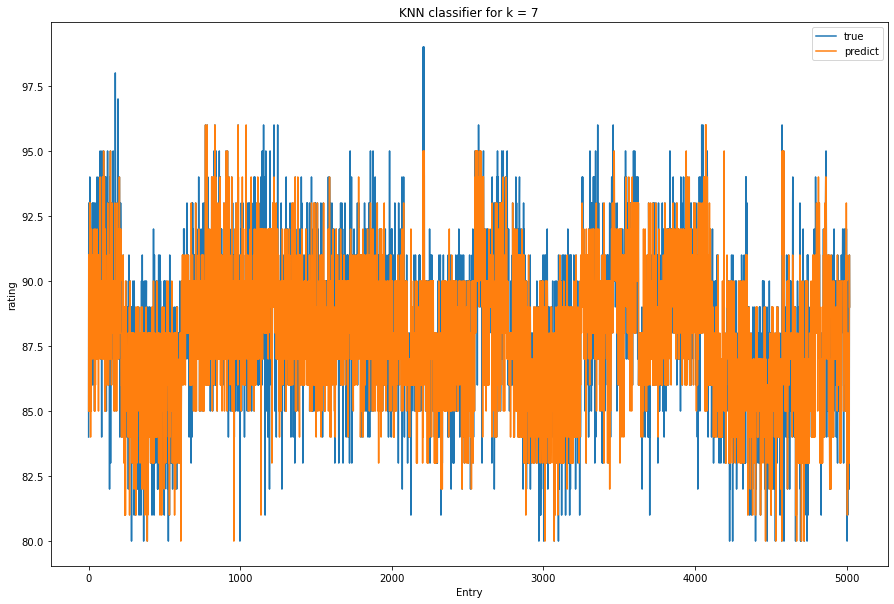

accuracy: 0.3659362549800797
[0.20318725 0.19123506 0.20717131 0.20916335 0.17729084 0.20717131
 0.24103586 0.187251   0.1812749  0.1812749 ]
k_10: accuracies_mean: 0.19860557768924303, accuracies_std: 0.0182148414192767


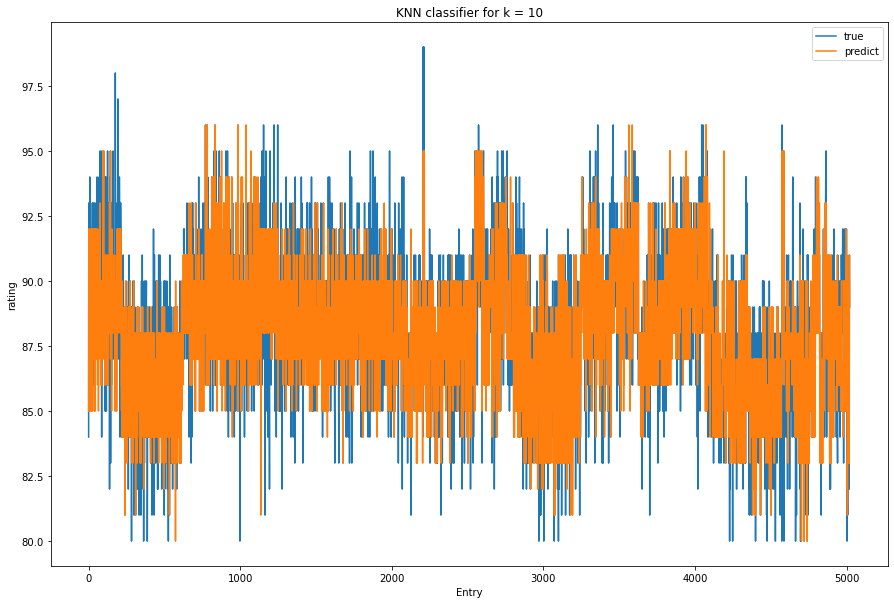

accuracy: 0.3344621513944223
[0.1752988  0.19521912 0.19322709 0.18326693 0.19322709 0.19322709
 0.20717131 0.19123506 0.17729084 0.1752988 ]
k_13: accuracies_mean: 0.18844621513944224, accuracies_std: 0.009847973780325316


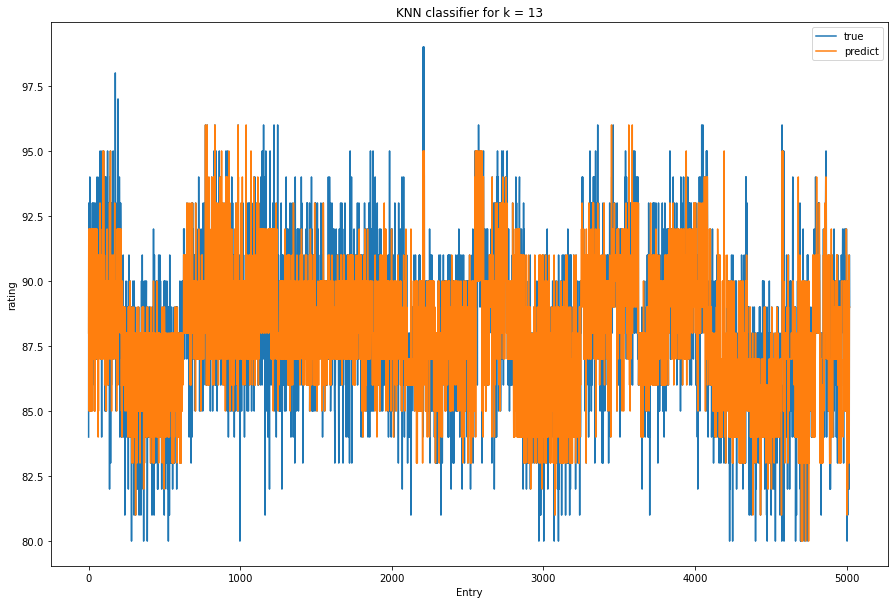

accuracy: 0.31673306772908366
[0.19123506 0.19721116 0.22908367 0.17330677 0.19123506 0.19322709
 0.22111554 0.18326693 0.187251   0.18525896]
k_16: accuracies_mean: 0.1952191235059761, accuracies_std: 0.016256737659843156


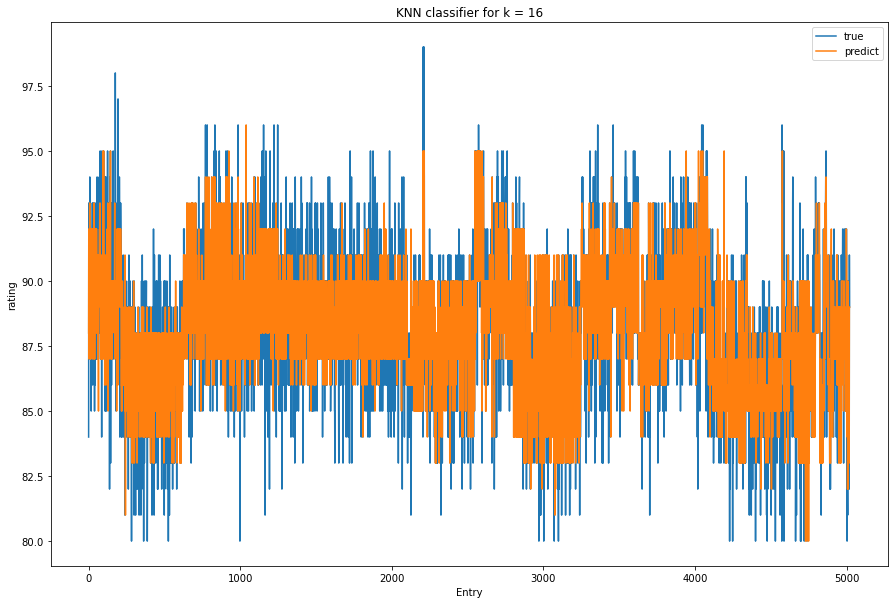

accuracy: 0.302191235059761
[0.17330677 0.21314741 0.20517928 0.1812749  0.20119522 0.19521912
 0.20916335 0.16733068 0.18924303 0.1812749 ]
k_19: accuracies_mean: 0.19163346613545817, accuracies_std: 0.014848322831541215


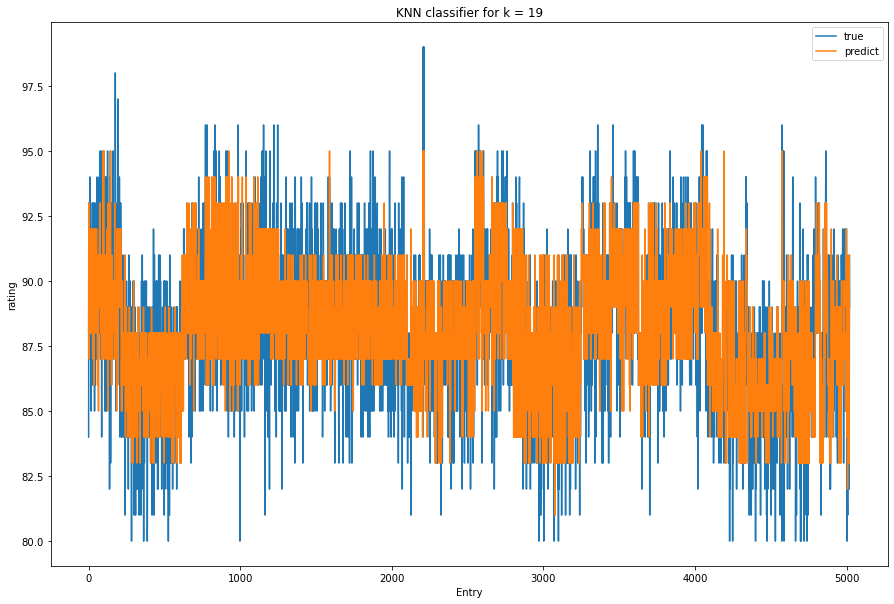

accuracy: 0.29163346613545815
[0.19721116 0.21115538 0.21314741 0.19920319 0.18525896 0.19123506
 0.22709163 0.15737052 0.18924303 0.17928287]
k_22: accuracies_mean: 0.19501992031872512, accuracies_std: 0.01856868639261785


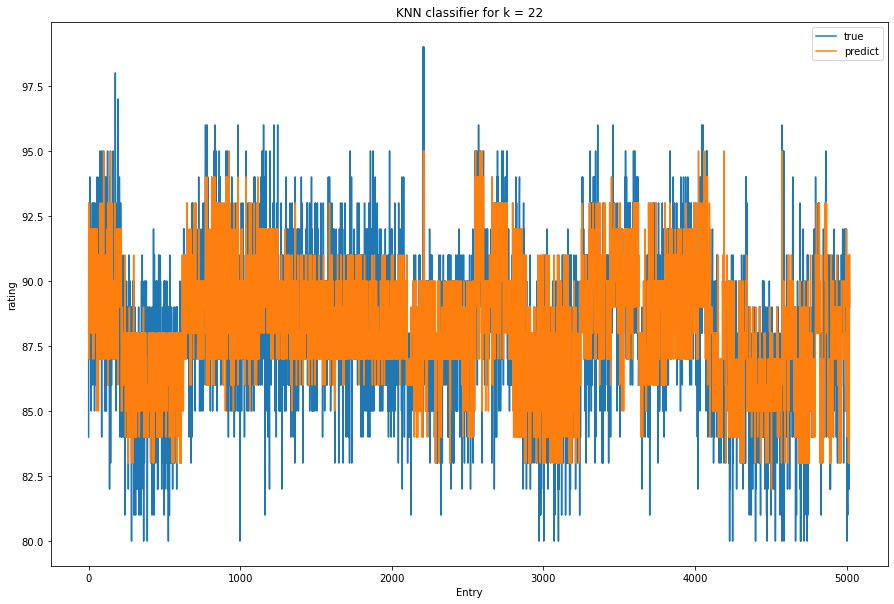

accuracy: 0.28167330677290836
[0.1812749  0.20916335 0.20916335 0.17928287 0.20717131 0.19920319
 0.2310757  0.18525896 0.19721116 0.19322709]
k_25: accuracies_mean: 0.199203187250996, accuracies_std: 0.014933597461347658


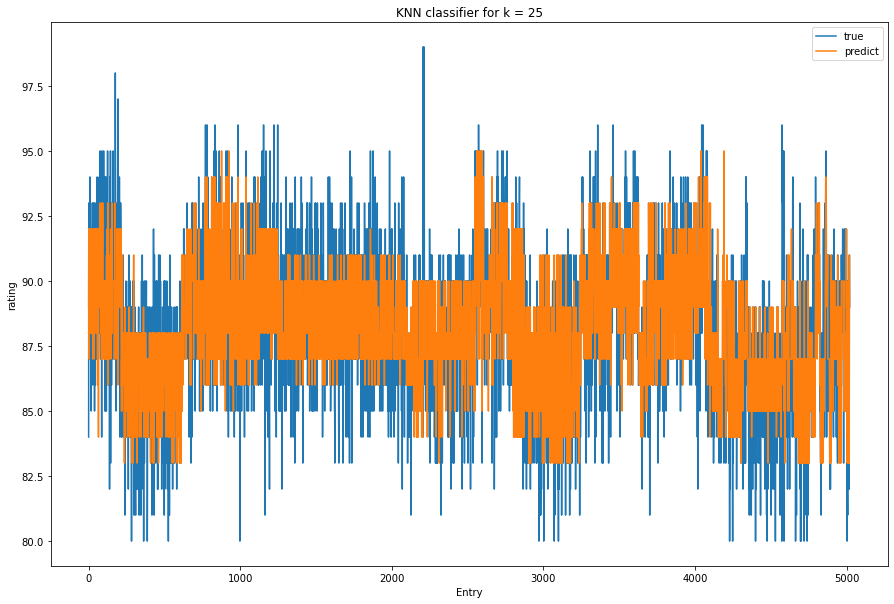

accuracy: 0.2764940239043825
[0.17928287 0.22310757 0.20517928 0.187251   0.17928287 0.19123506
 0.22111554 0.1752988  0.19521912 0.19123506]
k_28: accuracies_mean: 0.1948207171314741, accuracies_std: 0.015956162864144047


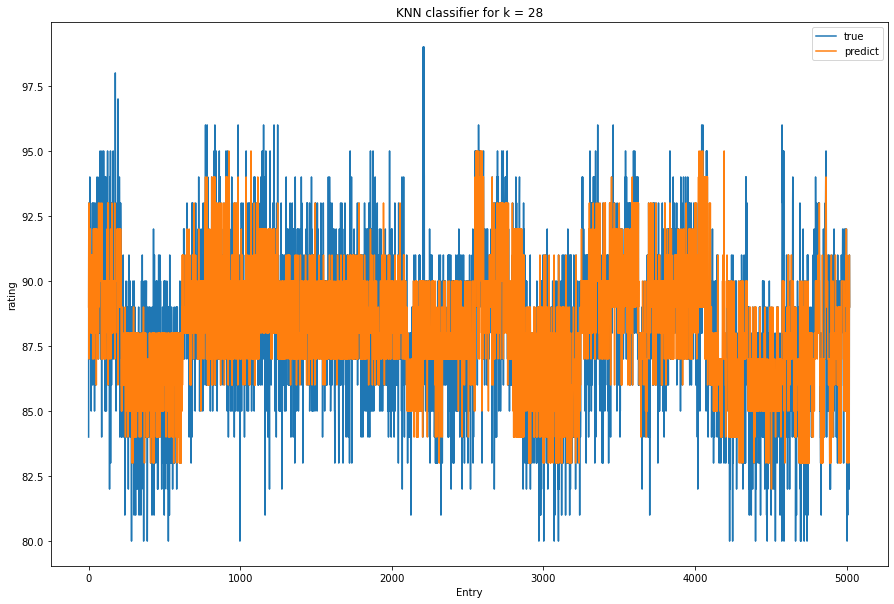

In [6]:
# standardize the data
scaler = StandardScaler(copy = True)
# X_new = scaler.fit_transform(X)
X_new = X
print(X)

scoring = 'accuracy'
k = 10

accuracies = []
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
for k in range(1, 30, 3):
    # break
    my_model = KNeighborsClassifier(n_neighbors = k)
    # usar cross validation para ver como o modelo se comporta
    
    results = cross_val_score(my_model, X_new, y, cv = kfold, scoring = scoring)


    my_model.fit(X_new, y)
    y_pred = my_model.predict(X_new)
    
    accuracies.append(accuracy_score(y, y_pred))
    print(f'accuracy: {accuracies[-1]}')
    print(results)
    print(f"k_{k}: accuracies_mean: {results.mean()}, accuracies_std: {results.std()}")

    #'''
    plt.figure(figsize=(15,10))
    plt.plot(y, label = "true")
    plt.plot(y_pred, label = "predict")
    plt.legend()
    plt.title(f"KNN classifier for k = {k}")
    plt.xlabel("Entry")
    plt.ylabel("rating")
    plt.show()
    #'''

Score: 0.2051792828685259


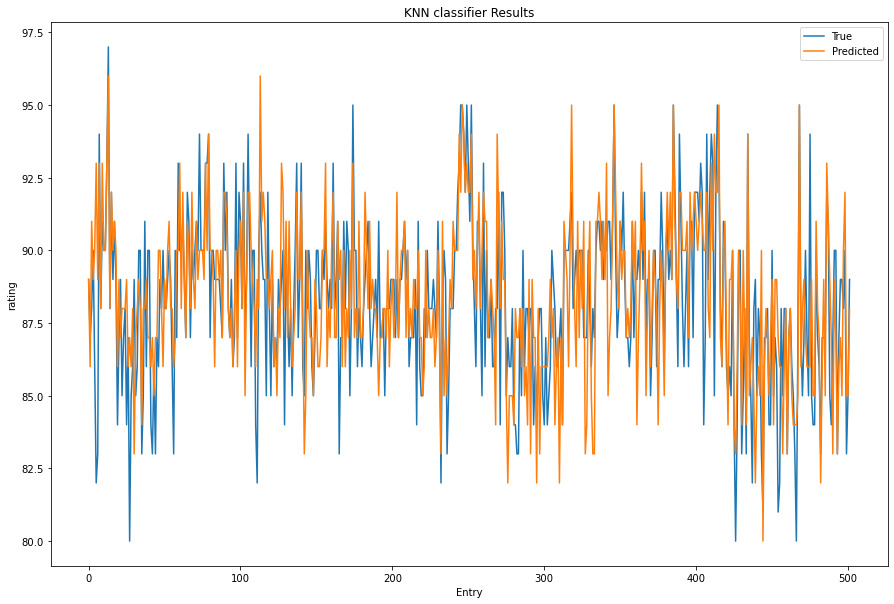

Score: 0.199203187250996


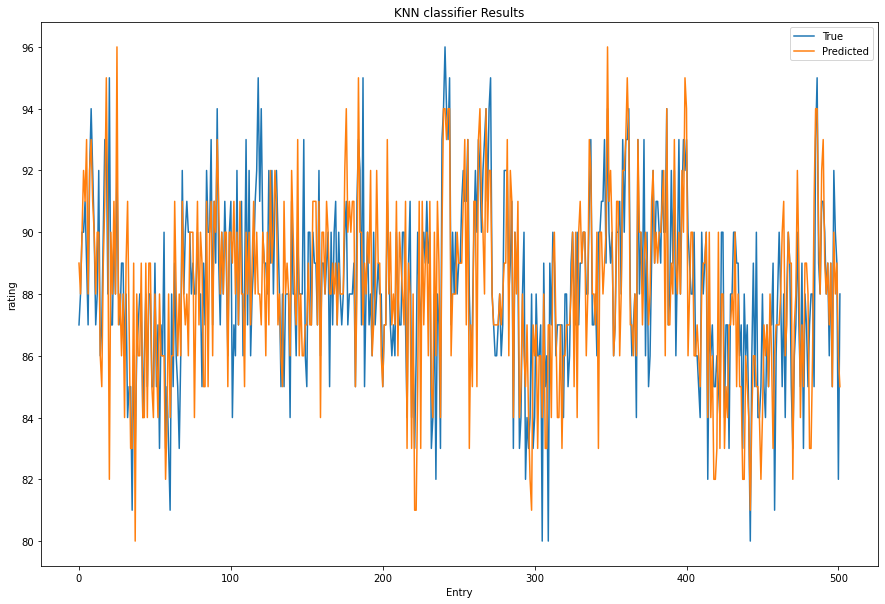

Score: 0.22709163346613545


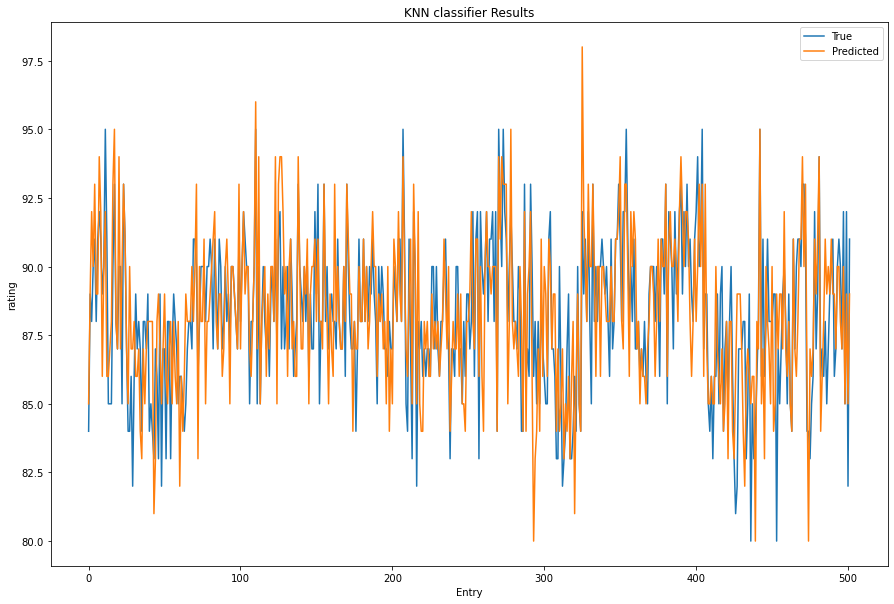

Score: 0.199203187250996


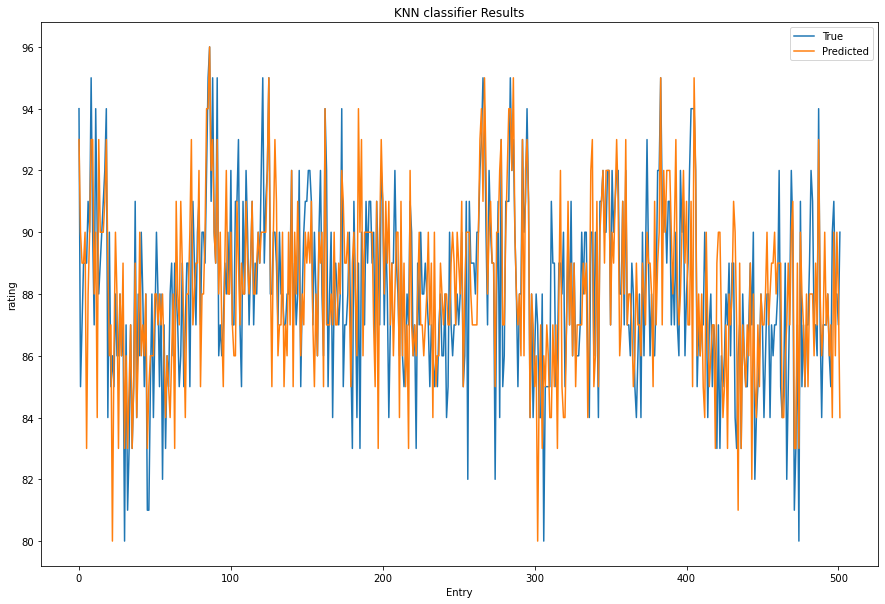

Score: 0.19721115537848605


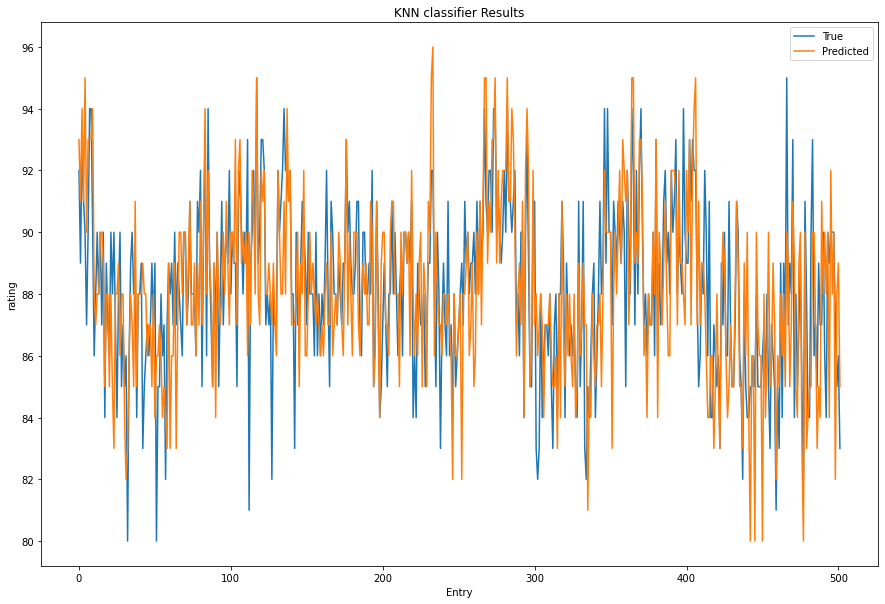

Score: 0.17928286852589642


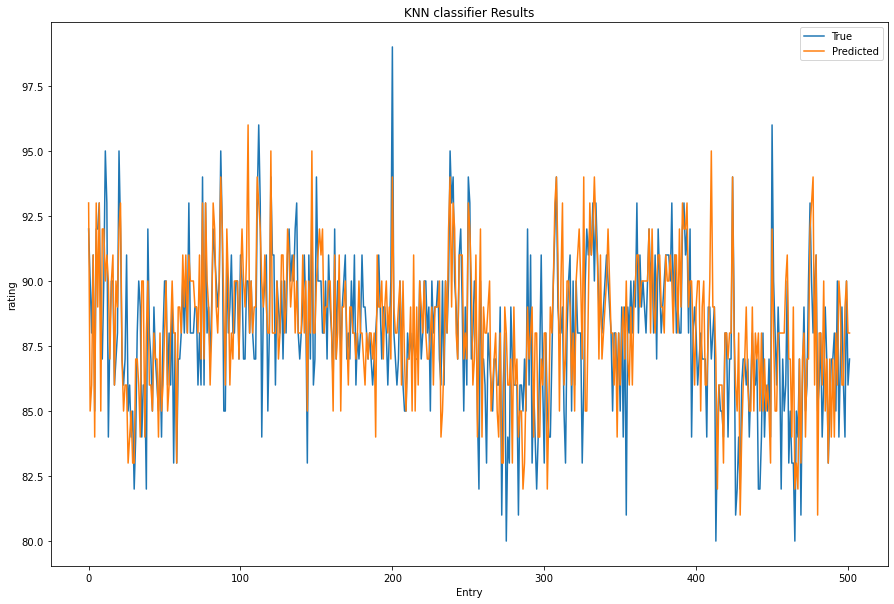

Score: 0.21713147410358566


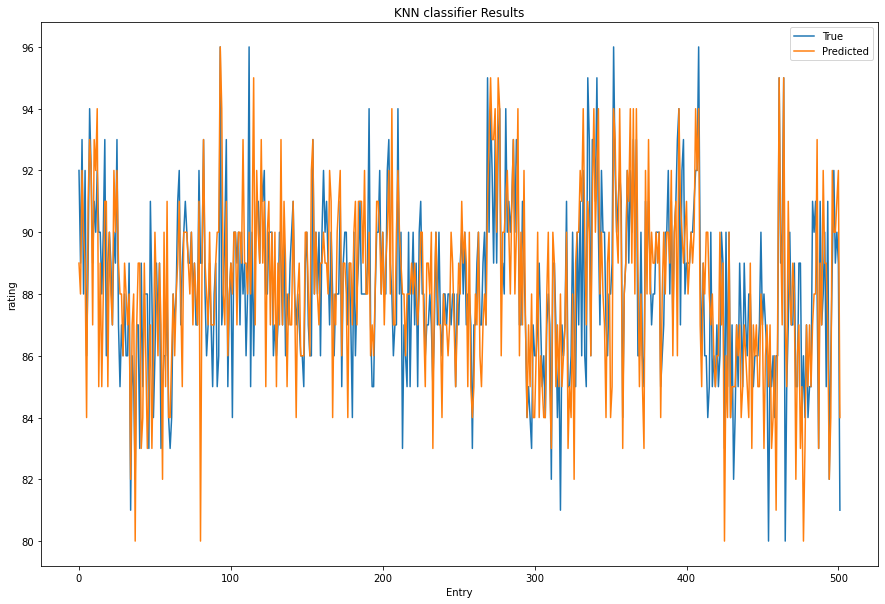

Score: 0.22310756972111553


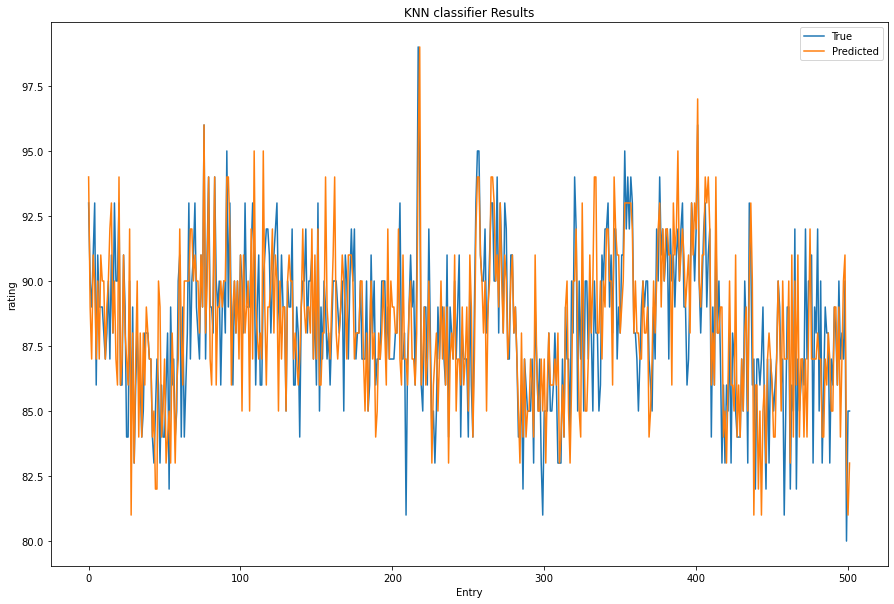

Score: 0.1892430278884462


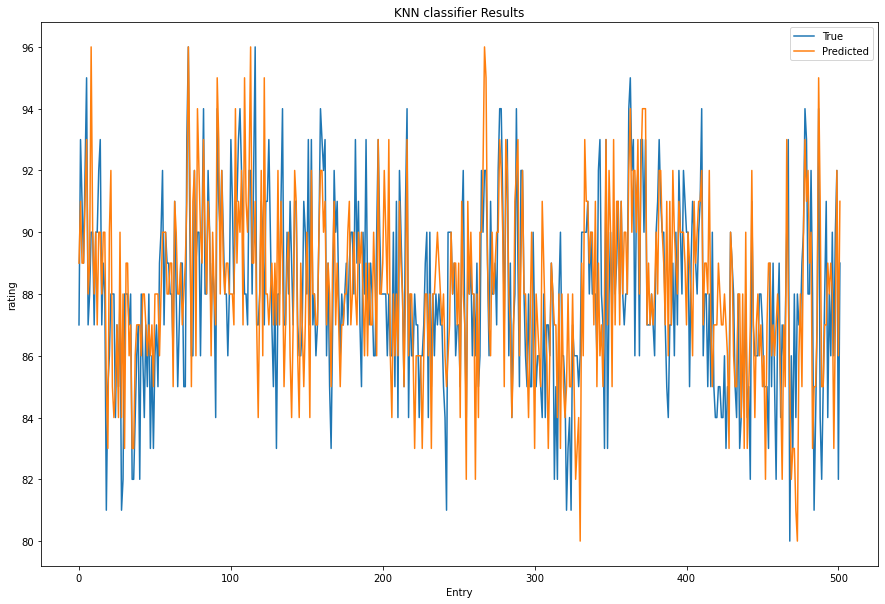

Score: 0.20717131474103587


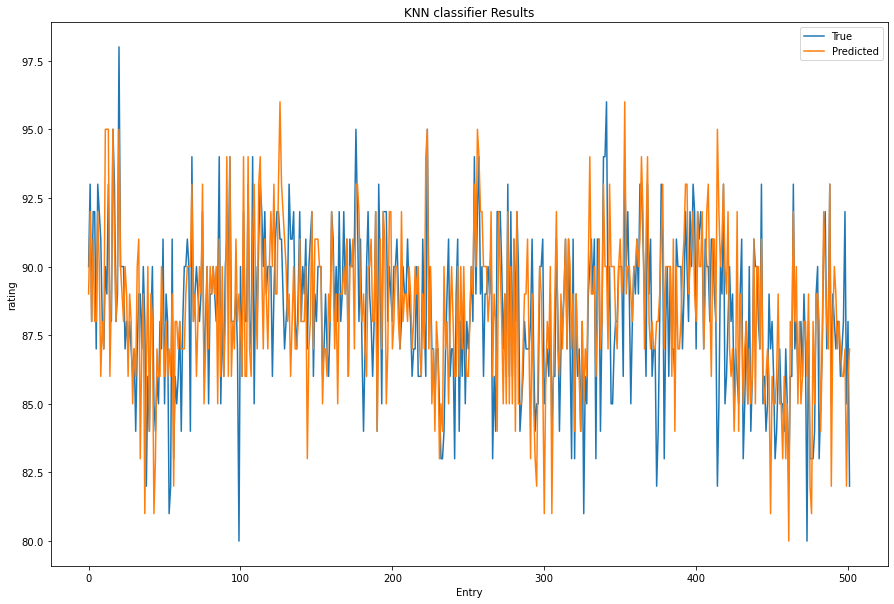

[0.2051792828685259, 0.199203187250996, 0.22709163346613545, 0.199203187250996, 0.19721115537848605, 0.17928286852589642, 0.21713147410358566, 0.22310756972111553, 0.1892430278884462, 0.20717131474103587]
Mean: 0.2043824701195219
Std: 0.014912915844493804


In [13]:
# X_new = scaler.fit_transform(X)
X_new = X

my_score = accuracy_score

scores = []
kfold = KFold(n_splits = 10, random_state=7, shuffle=True)
k = 1

for train_idxs, test_idxs in kfold.split(X_new):
    # Train test split from kfold
    X_train, y_train = X_new[train_idxs, :],  y[train_idxs]
    X_test, y_test = X_new[test_idxs, :], y[test_idxs]
    
    # Fit predict
    model = KNeighborsClassifier(n_neighbors = k)
    predicted = model.fit(X_train, y_train).predict(X_test)
    
    # Model Score
    scores.append(my_score(y_test, predicted))
    print(f"Score: {scores[-1]}")
    
    # Plotting
    plt.figure(figsize=(15,10))
    plt.plot(y_test, label="True")
    plt.plot(predicted, label= "Predicted")
    plt.xlabel("Entry")
    plt.ylabel("rating")
    plt.title("KNN classifier Results")
    plt.legend()
    plt.show()
print(scores)
print(f"Mean: {mean(scores)}")
print(f"Std: {stdev(scores)}")

accuracy: 0.9910358565737052
[0.17131474 0.1812749  0.17928287 0.15737052 0.15537849 0.1752988
 0.1752988  0.14541833 0.1812749  0.187251  ]
SVM: accuracies_mean: 0.1709163346613546, accuracies_std: 0.0129036930204794


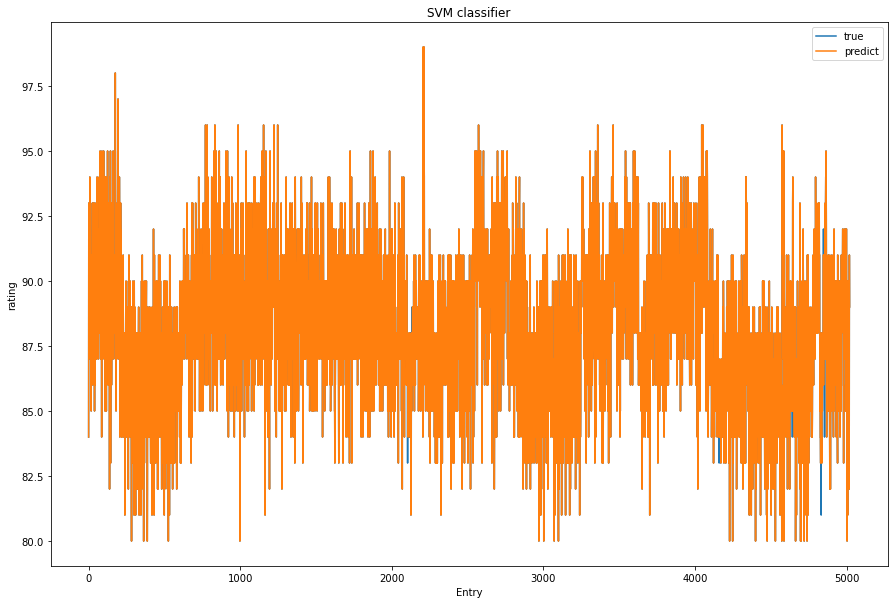

In [8]:
# SVM

# standardize the data
scaler = StandardScaler(copy = True)
# X_new = scaler.fit_transform(X)
X_new = X


kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
scoring = 'accuracy'
gamma = 1

C = 100
my_model = SVC(C = C, gamma = gamma)
# usar cross validation para ver como o modelo se comporta

results = cross_val_score(my_model, X_new, y, cv = kfold, scoring = scoring)


my_model.fit(X_new, y)
y_pred = my_model.predict(X_new)

accuracy = accuracy_score(y, y_pred)

print(f'accuracy: {accuracy}')
print(results)
print(f"SVM: accuracies_mean: {results.mean()}, accuracies_std: {results.std()}")

#'''
plt.figure(figsize=(15,10))
plt.plot(y, label = "true")
plt.plot(y_pred, label = "predict")
plt.legend()
plt.title(f"SVM classifier")
plt.xlabel("Entry")
plt.ylabel("rating")
plt.show()
#'''

accuracy: 0.9410358565737051
[0.20916335 0.21115538 0.23505976 0.20119522 0.20517928 0.21115538
 0.20916335 0.22310757 0.19721116 0.19521912]
SVM: accuracies_mean: 0.2097609561752988, accuracies_std: 0.011340593886446445


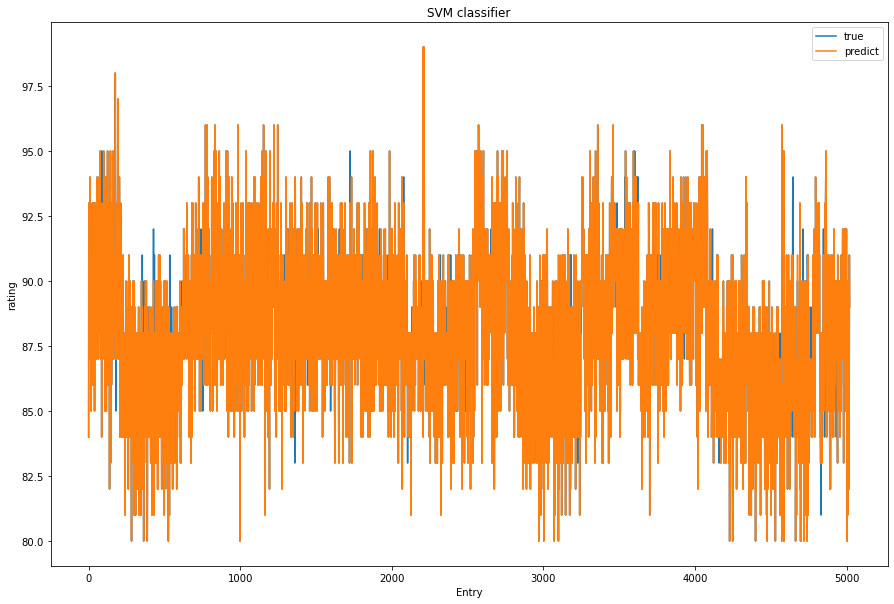

In [9]:
# SVM

# standardize the data
scaler = StandardScaler(copy = True)
# X_new = scaler.fit_transform(X)
X_new = X


kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
scoring = 'accuracy'

# READ
#https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

gamma = 0.1 # Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’

C = 10 # The C parameter trades off correct classification of training examples against maximization of the decision function’s margin.
       # For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points
       # correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy

my_model = SVC(C = C, gamma = gamma)


results = cross_val_score(my_model, X_new, y, cv = kfold, scoring = scoring)


my_model.fit(X_new, y)
y_pred = my_model.predict(X_new)

accuracy = accuracy_score(y, y_pred)

print(f'accuracy: {accuracy}')
print(results)
print(f"SVM: accuracies_mean: {results.mean()}, accuracies_std: {results.std()}")

#'''
plt.figure(figsize=(15,10))
plt.plot(y, label = "true")
plt.plot(y_pred, label = "predict")
plt.legend()
plt.title(f"SVM classifier")
plt.xlabel("Entry")
plt.ylabel("rating")
plt.show()
#'''

accuracy: 0.9944223107569721
[0.20517928 0.19322709 0.20916335 0.20916335 0.1752988  0.18525896
 0.21314741 0.21713147 0.18525896 0.20717131]
Decision Tree: accuracies_mean: 0.2, accuracies_std: 0.013428127128567903


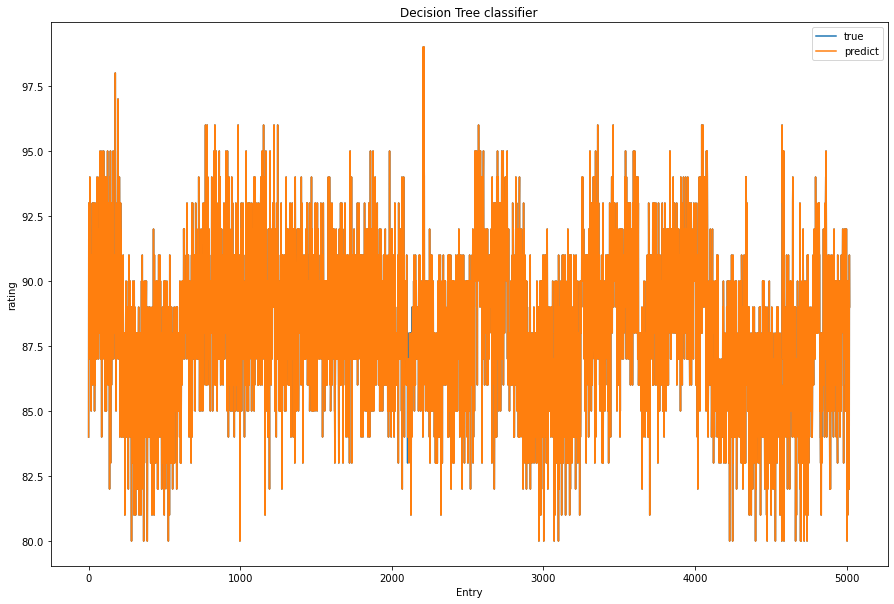

In [10]:
# Decision Tree

# standardize the data
scaler = StandardScaler(copy = True)
# X_new = scaler.fit_transform(X)
X_new = X


kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
scoring = 'accuracy'

my_model = DecisionTreeClassifier()


results = cross_val_score(my_model, X_new, y, cv = kfold, scoring = scoring)


my_model.fit(X_new, y)
y_pred = my_model.predict(X_new)

accuracy = accuracy_score(y, y_pred)

print(f'accuracy: {accuracy}')
print(results)
print(f"Decision Tree: accuracies_mean: {results.mean()}, accuracies_std: {results.std()}")

#'''
plt.figure(figsize=(15,10))
plt.plot(y, label = "true")
plt.plot(y_pred, label = "predict")
plt.legend()
plt.title(f"Decision Tree classifier")
plt.xlabel("Entry")
plt.ylabel("rating")
plt.show()
#'''

accuracy: 0.16334661354581673
[0.06972112 0.07370518 0.08964143 0.09163347 0.08167331 0.06573705
 0.05577689 0.07968127 0.08366534 0.06772908]
GaussianNB: accuracies_mean: 0.07589641434262948, accuracies_std: 0.01078092360775682


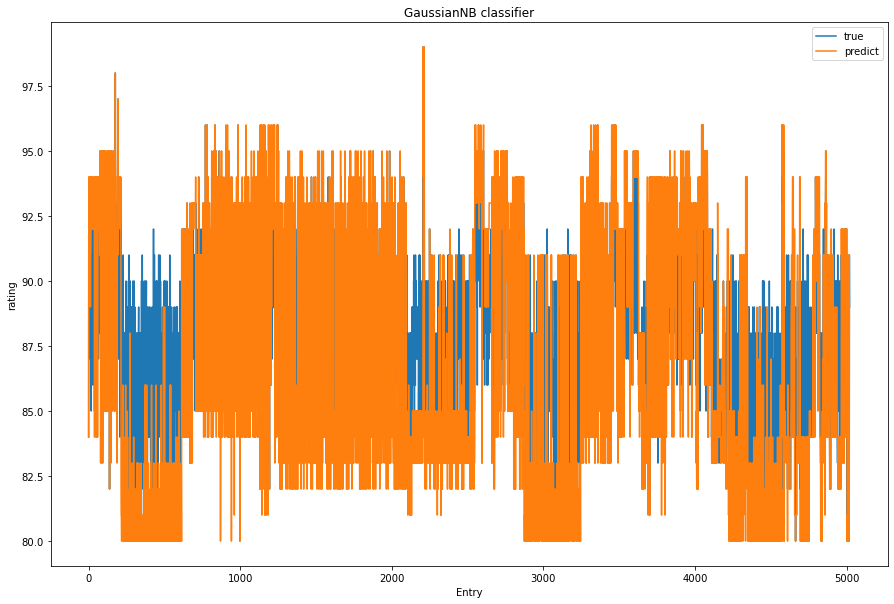

In [11]:
# GaussianNB

# standardize the data
scaler = StandardScaler(copy = True)
# X_new = scaler.fit_transform(X)
X_new = X


kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
scoring = 'accuracy'

my_model = GaussianNB()


results = cross_val_score(my_model, X_new, y, cv = kfold, scoring = scoring)


my_model.fit(X_new, y)
y_pred = my_model.predict(X_new)

accuracy = accuracy_score(y, y_pred)

print(f'accuracy: {accuracy}')
print(results)
print(f"GaussianNB: accuracies_mean: {results.mean()}, accuracies_std: {results.std()}")

#'''
plt.figure(figsize=(15,10))
plt.plot(y, label = "true")
plt.plot(y_pred, label = "predict")
plt.legend()
plt.title(f"GaussianNB classifier")
plt.xlabel("Entry")
plt.ylabel("rating")
plt.show()
#'''

accuracy: 0.38784860557768924
[0.2310757  0.21912351 0.20717131 0.22908367 0.22310757 0.20717131
 0.22111554 0.19322709 0.17131474 0.20119522]
LinearDiscriminantAnalysis: accuracies_mean: 0.21035856573705178, accuracies_std: 0.017484548412343977


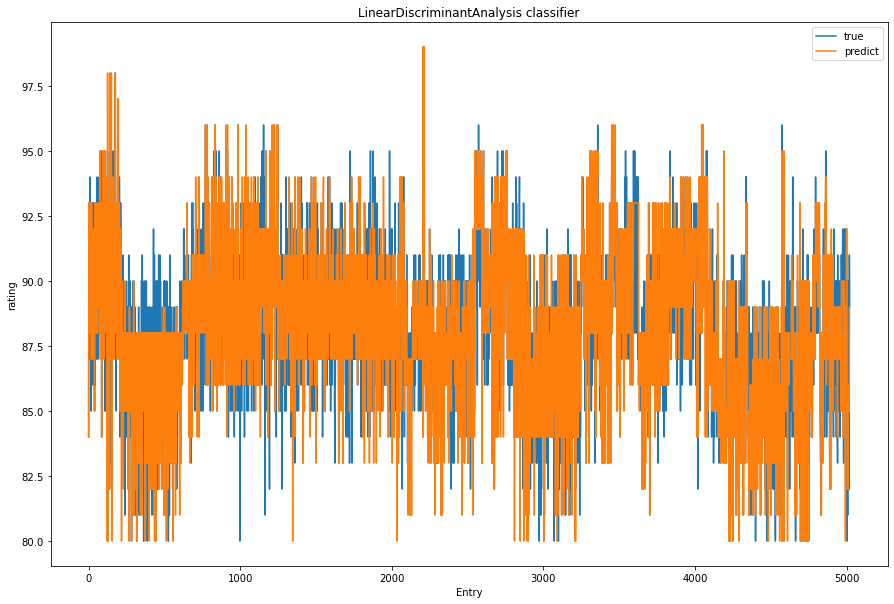

In [12]:
# LinearDiscriminantAnalysis

# standardize the data
scaler = StandardScaler(copy = True)
# X_new = scaler.fit_transform(X)
X_new = X


kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
scoring = 'accuracy'

my_model = LinearDiscriminantAnalysis()


results = cross_val_score(my_model, X_new, y, cv = kfold, scoring = scoring)


my_model.fit(X_new, y)
y_pred = my_model.predict(X_new)

accuracy = accuracy_score(y, y_pred)

print(f'accuracy: {accuracy}')
print(results)
print(f"LinearDiscriminantAnalysis: accuracies_mean: {results.mean()}, accuracies_std: {results.std()}")

#'''
plt.figure(figsize=(15,10))
plt.plot(y, label = "true")
plt.plot(y_pred, label = "predict")
plt.legend()
plt.title(f"LinearDiscriminantAnalysis classifier")
plt.xlabel("Entry")
plt.ylabel("rating")
plt.show()
#'''